### ***Assignment : All Life Bank Unsupervised Learning***

***Description :***

***Context :***

All Life Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as up sell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer’s queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


***Objective :*** To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.


***Dataset :***  ALLLife bank

***Link :*** https://docs.google.com/spreadsheets/d/1eGSk-fRO01iSbCsBj3-fWn1jsU4ReUMo/edit?usp=sharing&ouid=109867172365159747072&rtpof=true&sd=true


***Data Description :*** Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.


***Key Questions:***

1.	Perform EDA.

2.	Apply Clustering Algorithms and mentions how many clusters are formed?

3.	How are these segments different from each other?

4.	What are your recommendations to the bank on how to better market to and service these customers?



***Define the problem and perform an Exploratory Data Analysis***

"- Problem definition, questions to be answered - Data background and contents - Univariate analysis - Bivariate analysis "	
Illustrate the insights based on EDA
Key meaningful observations on individual variables and the relationship between variables	

***Data pre-processing***

"Prepare the data for analysis - Feature Engineering - Missing value Treatment - Outlier Treatment - Duplicate observations check and removal if found"	

***Applying K-means clustering algorithms***

"Apply K-means - Elbow curve - Silhouette Score - figure out appropriate number of cluster"	

***Applying Hierarchical clustering***

"- Apply Hierarchical clustering with different linkage methods - Plot dendrograms for each linkage methods - Choose appropriate number of cluster"	

***Compare cluster K-means clusters and Hierarchical clusters - Perform cluster profiling - Derive Insights***

"- Compare clusters obtained from k-means and hierarchical clustering techniques - Perform cluster profiling - Insights about different clusters"	

***Actionable Insights & Recommendations***

"- Conclude with the key takeaways for the business - What would your business recommendation."	

***Notebook - Overall***
"- Structure and flow - Well commented code"	



In [1]:
# import the libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn import metrics
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn import cluster
from sklearn.cluster import SpectralClustering

In [2]:
# read data

data = pd.read_excel('Credit Card Customer Data.xlsx')

In [3]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
data.shape

(660, 7)

***Observation :***

- 660 observations(rows) and 7 variables(features)

- Sl_No and Customer_Key can be dropped as it is not needed for model training

- There is no target variable here. So, we need to build an unsupervised learning model

- Credit limit has higher magnitude compared to other columns. We need to scale the features

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


***Observation :***

- All columns are in int datatype

- No nulls being observed

In [6]:
#Checking for NUll values

data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

***Observation :***

- no NULL value present in this dataset

In [7]:
#Checking for duplicates

data[data.duplicated()].count()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

***Observation :***

- There are no duplicate records

In [8]:
# Check for unique data in each column:


data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

***Observation :***

- Customer key, which is an identifier, has repeated values.

#### Duplicate observations check and removal if found

In [9]:
# Identified duplicated values in Customer key

cust_duplicate = data.duplicated('Customer Key') == True
cust_duplicate

0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Length: 660, dtype: bool

In [10]:
# remove duplicated values in Customer key

data = data[cust_duplicate == False]

In [11]:
#Drop unwanted columns

data.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)

In [12]:
data.shape

(655, 5)

***Observation :***
    
- After removing duplicated values and rows and unnecessary columns, there are 655 rows and 5 columns.

### Exploratory Data Analysis

In [13]:
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [14]:
data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,655.000000,655.000000,655.000000,655.000000,655.000000
mean,34242.748092,4.691603,2.401527,2.606107,3.601527
std,37240.896986,2.169325,1.633648,2.940380,2.867352
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


***Observation :***

- "Avg_Credit_Limit" ranges from 3K to 200K with an avg of 34.5K but 50% of customers have less than 18K. So it is heavily right skewed. It has a Std Deviation of 37K

- "Total_Credit_Cards" ranges from 1 to 10 cards with an avg of 4.69 and also 50% of customers is equal to 5. It has a Std Deviation of 2.16

- "Total_visits_bank" ranges from 0 to 5 times with an avg of 2.40 and also 50% of customers is equal to 2. It has a Std Deviation of 1.63

- "Total_visits_online" ranges from 0 to 15 times with an avg of 2.60 and also 50% of customers is equal to 2. 75% of customers in the dataset have online visits equal to 4. So it is heavily right skewed. It has a Std Deviation of 2.94

- "Total_calls_made" ranges from 0 to 10 times with an avg of 3.60 and also 50% of customers is equal to 3. Little bit right skewed. It has a Std Deviation of 2.86

#### Univariate Analysis

In [15]:
cols = data.columns
cols

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

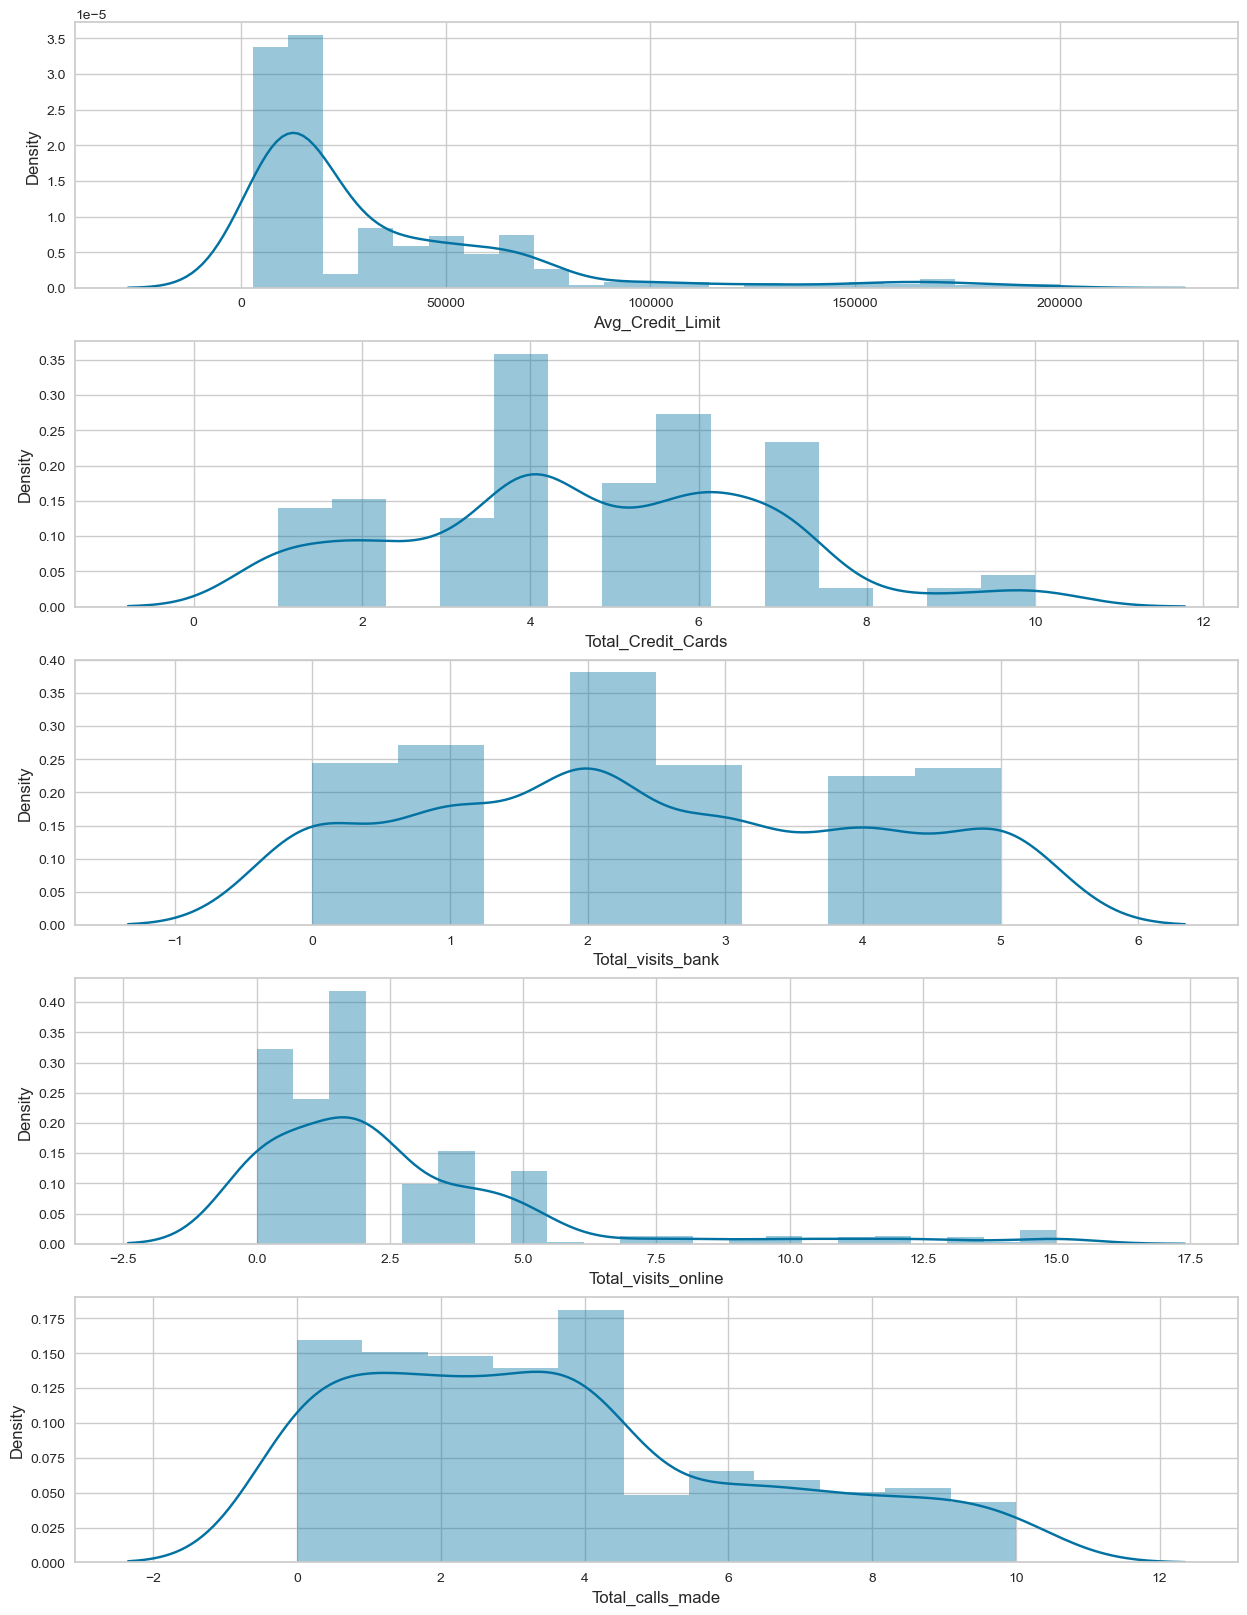

In [16]:
# univariate analysis for continuous variable

fig, ax = plt.subplots(figsize = (15,20))

for i in range(0, len(cols)):
    plt.subplot(5, 1, i+1)
    sns.distplot(data[cols[i]])
    plt.xlabel(cols[i])

***Observation :***

- Avg_Credit_Limit is heavily right skewed

- more number of customers with lesser avg credit limits (< 100k)

- Total_Credit_Cards, Total_visits_online, Total_calls_made have multiple peaks

- majority of customers have 4 credit cards

- majority of customers visited bank twice

- majority of customers visited bank online is twice

- majority of customers made <=5 calls to the bank

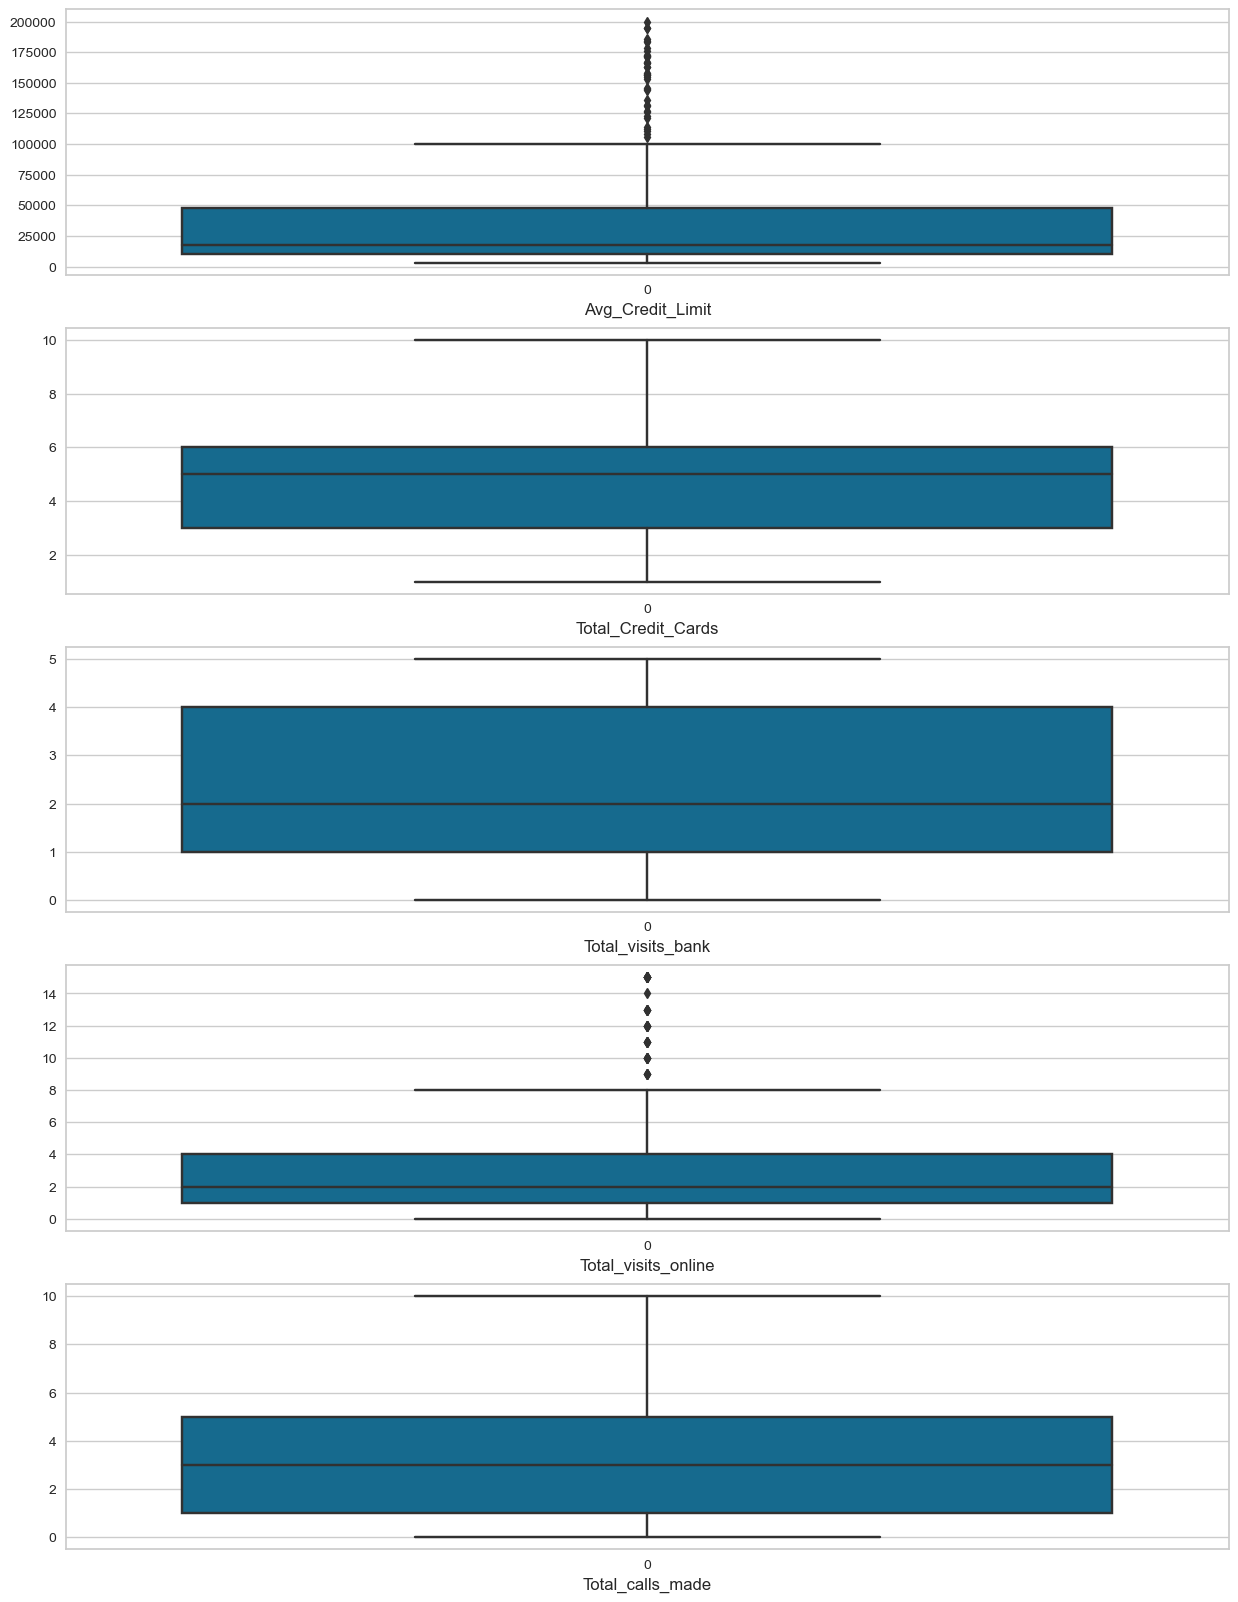

In [17]:
#Box plots

fig, ax = plt.subplots(figsize = (15, 20))

for i in range(0, len(cols)):
    plt.subplot(5, 1, i+1)
    sns.boxplot(data[cols[i]])
    plt.xlabel(cols[i])

***Observation :***

- Avg_Credit_Limit has a lot of outliers

- Total_visits_online has some outliers to the right

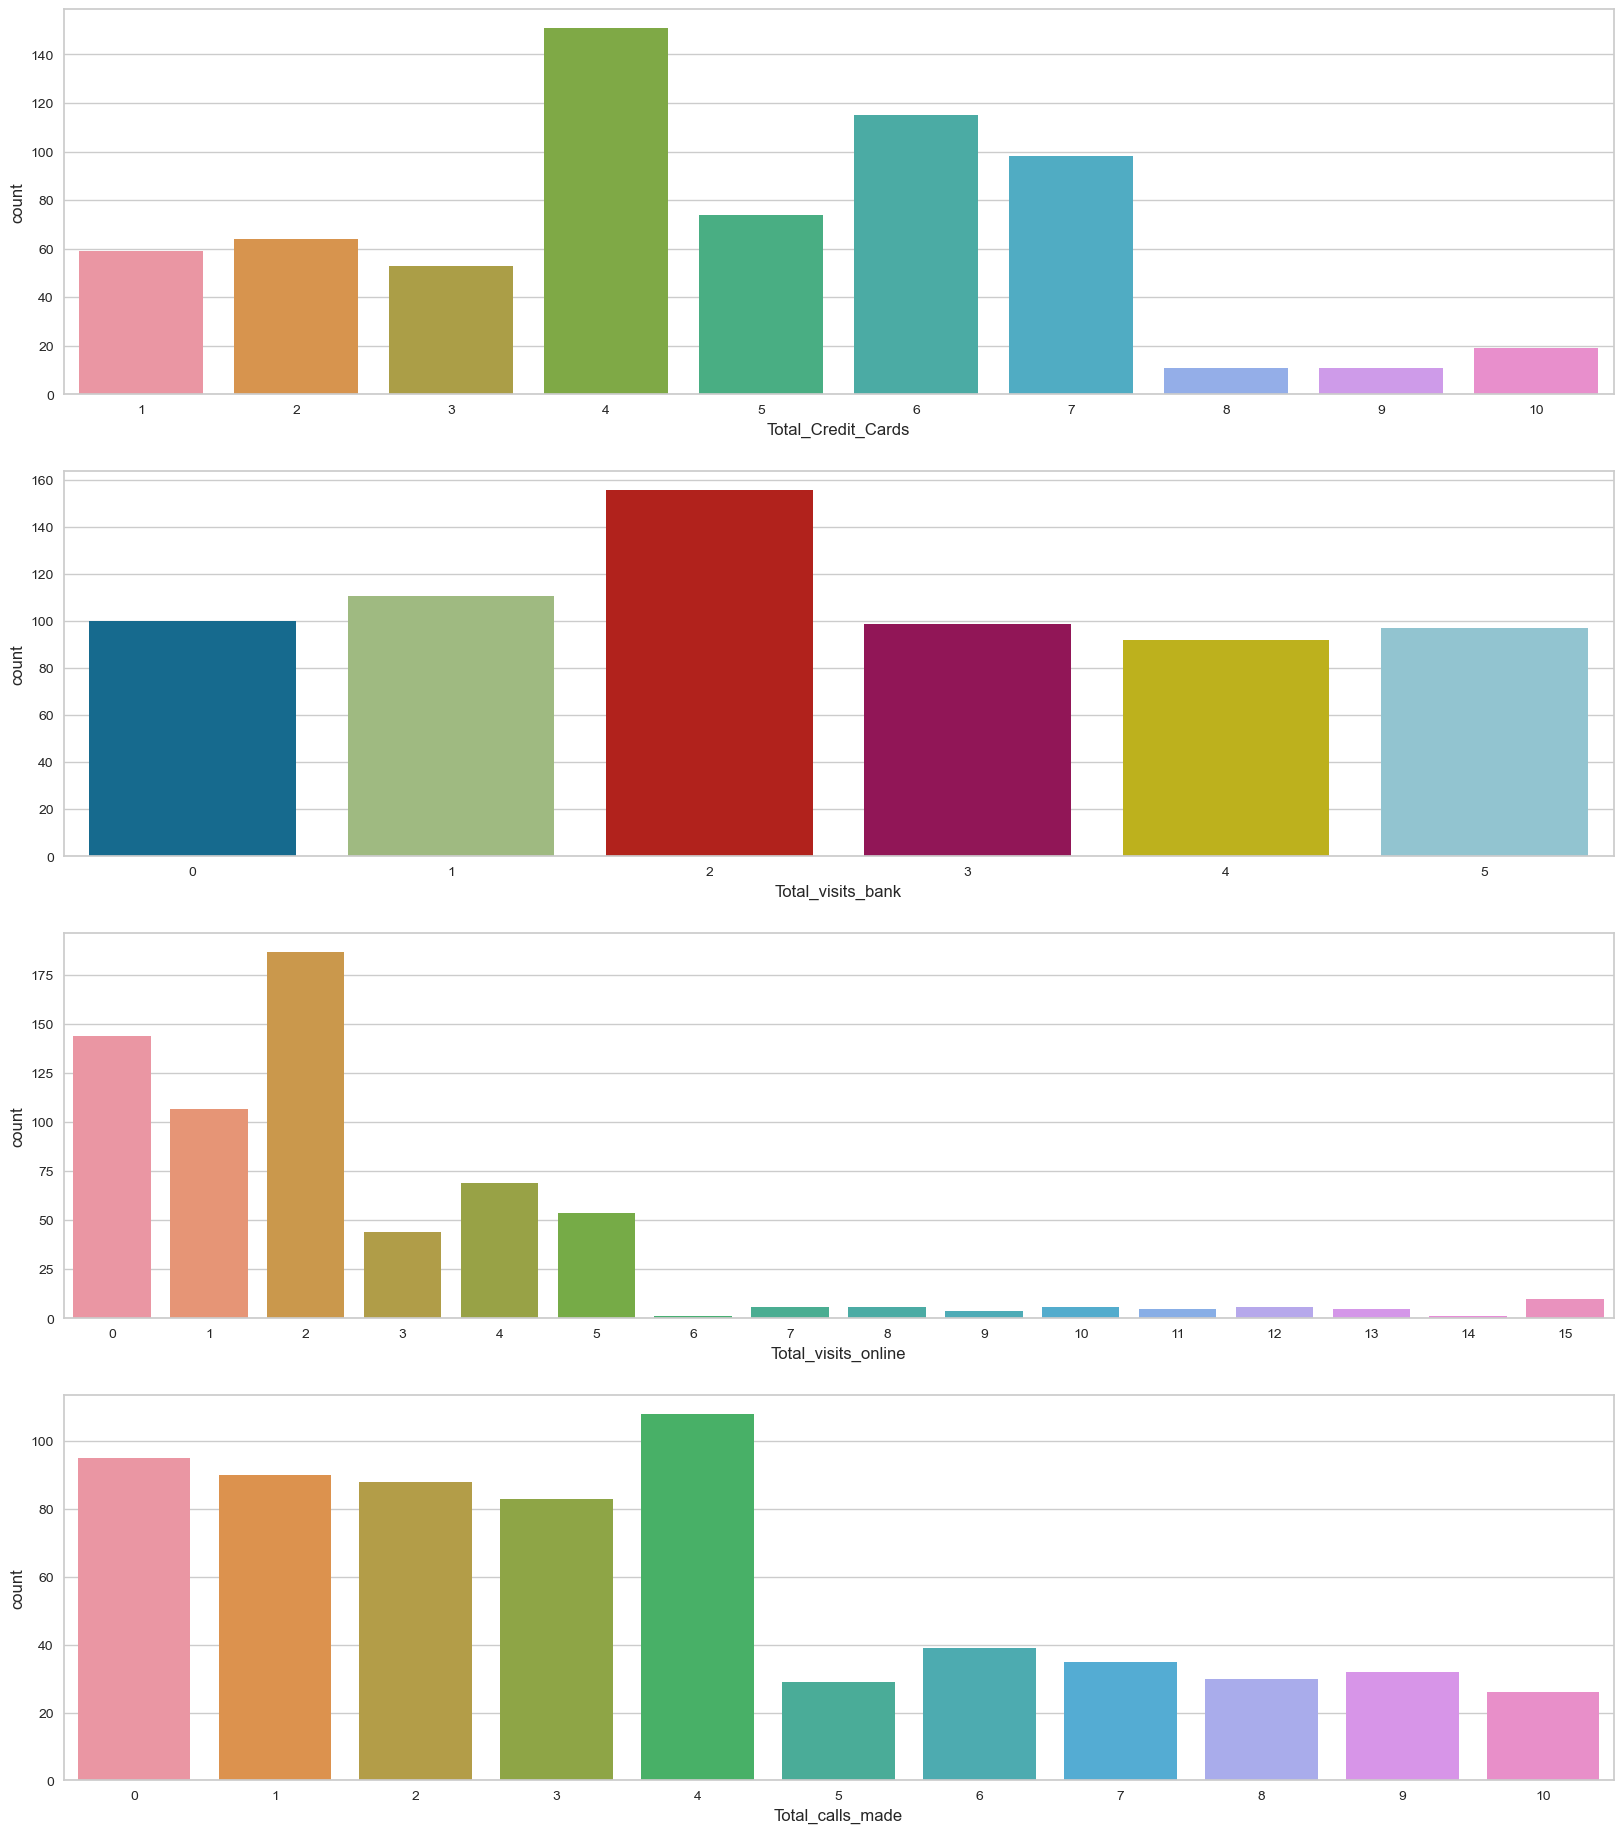

In [18]:
#Count Plots

cols1 = ['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (20, 23))

for ind, col in enumerate(cols1):
    sns.countplot(x = col, data = data, ax = ax[ind])

***Observation***

- Majority of customers have 4 credit cards and then 6 and 7 credit cards. Very few have >=8 cards.

- ~160 customers visited bank twice.

- Majority of customers visited bank online for 2 times.

- Majority of customers made <=4 calls to the bank.

In [19]:
# Group by total credit cards and mean of diffierent modes of communication

data.groupby('Total_Credit_Cards').mean().iloc[:,1:5]

,Total_visits_bank,Total_visits_online,Total_calls_made
Total_Credit_Cards,,,
1,0.932203,3.491525,7.220339
2,0.921875,3.531250,6.515625
3,0.867925,3.698113,6.641509
4,2.768212,1.728477,3.529801
5,3.256757,1.216216,2.135135
6,3.582609,1.156522,1.913043
7,3.214286,1.530612,2.142857
8,0.636364,9.272727,0.818182
9,0.727273,11.272727,1.272727


***Observation :***

- Visits to bank is less for 1-3 credit cards and 8-10 credit cards and is more for customers having 4-7 credit cards

- Customers having more number of credit cards (8-10) credit cards are visiting online more compared to less no of cards holding customers

- More calls are from customers having less number of credit cards (1-4)

#### Bi-variate Analysis

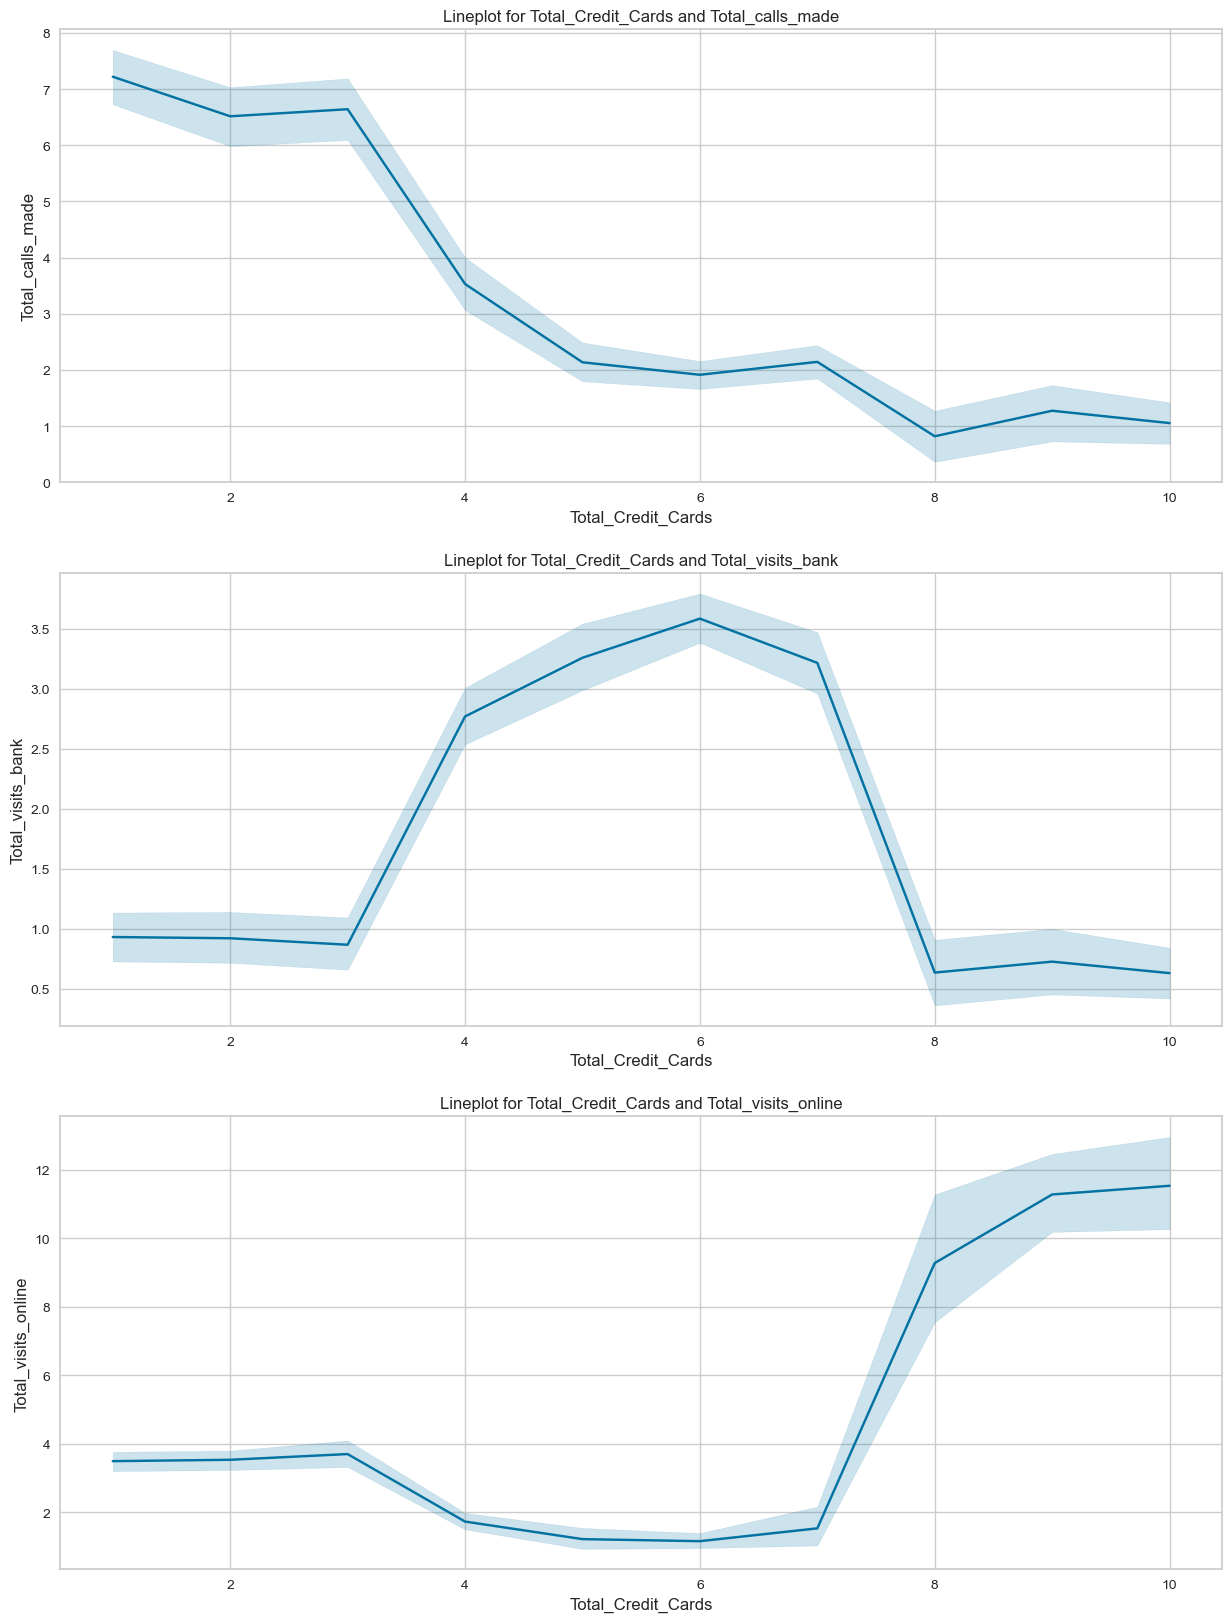

In [20]:
# Line plot

plt.subplots(3,1,figsize = (15, 20))

plt.subplot(311)
sns.lineplot(data = data, x = "Total_Credit_Cards", y = "Total_calls_made")
plt.title('Lineplot for Total_Credit_Cards and Total_calls_made')

plt.subplot(312)
sns.lineplot(data = data, x = "Total_Credit_Cards", y = "Total_visits_bank")
plt.title('Lineplot for Total_Credit_Cards and Total_visits_bank')

plt.subplot(313)
sns.lineplot(data = data, x = "Total_Credit_Cards", y = "Total_visits_online")
plt.title('Lineplot for Total_Credit_Cards and Total_visits_online')

plt.show()

***Observation :***

- One intresting observation is calls made to bank is reducing as the number of credit cards increased and customers who have less credit cards 1 - 3 are calling bank frequently.

- Vists to bank is more for customers having credit cards between 4 to 7

- More visits online for customers having more credit cards 8 to 10

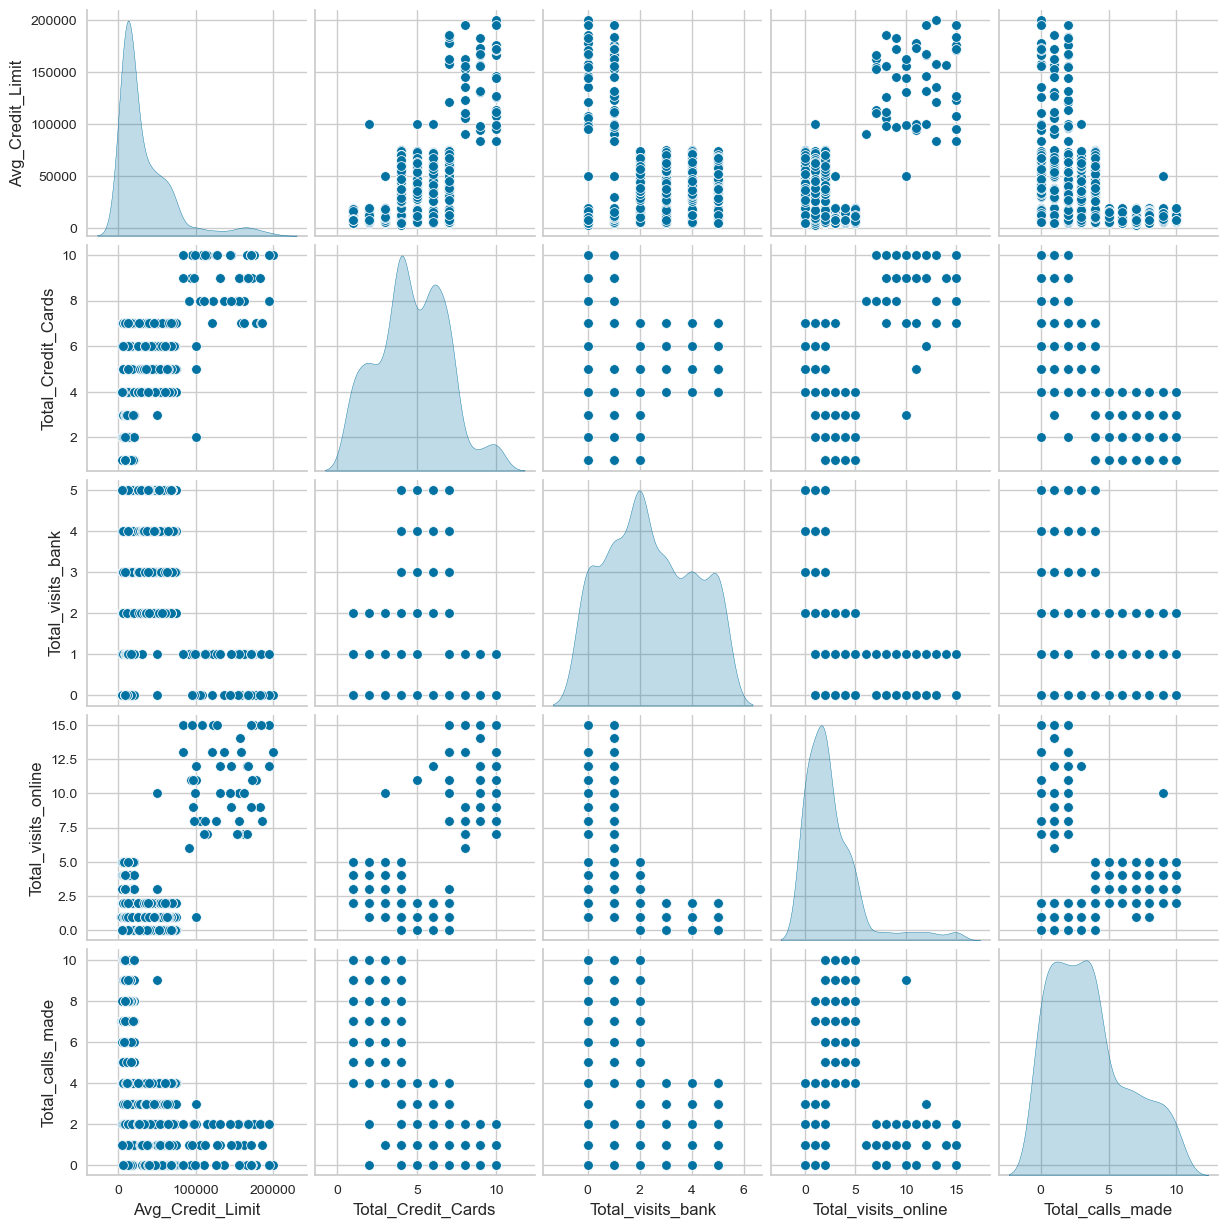

In [21]:
#  Pair plot

sns.pairplot(data, diag_kind = 'kde');

***Observations :***

- From diagonal plots : - we can see "Visits Online" has 4-6 points (majorly) - Calls made - shows 2 peaks majorily - visits bank - shows 5 peaks - credit cards shows 4 peaks

- From Bivariate plots: - we can see 2 clusters between credit limit and credit cards - 2 clusters between credit limit and visit online - 2 clusters between total visits online and credit cards - 3 clusters between total visits online and calls made - Credit cards and visit online have +ve relationship - Credit limits and visit online have +ve relationship - Visit bank and visit online have -ve relationship - visit to bank and calls made have -ve relationship - kind of -ve relationship between credit limit and calls made; credit limits and visit to bank; credit cards and calls made

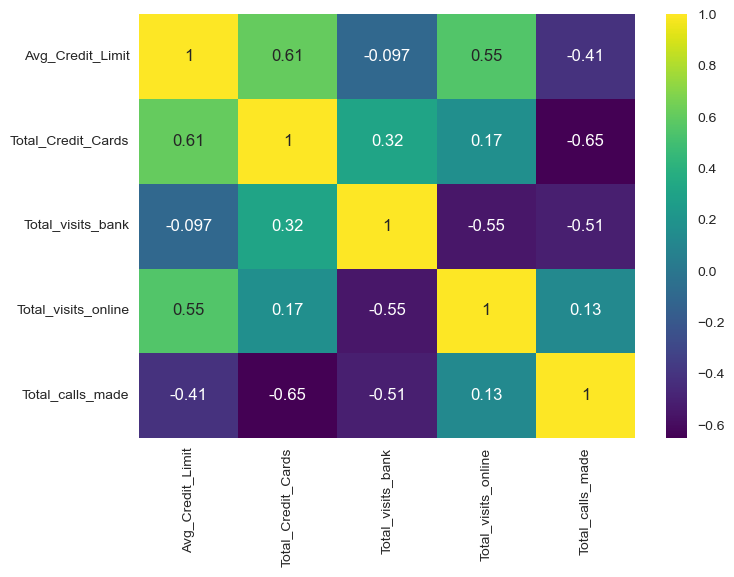

In [22]:
# Heatmap

sns.heatmap(data.corr(), annot=True, cmap='viridis');
plt.show()

***Observation :***

+ve correlation (0.61) between credit limit and no. of cards

+ve correlation (0.55) between credit limit and visits online

-ve correlation (-0.41) between credit limit and calls made

-ve correlation (-0.65) between calls made and total credit cards

-ve correlation (-0.55) between online visits and bank visits

-ve correlation (-0.51) between calls made and vists to bank

### Data Pre-processing

#### Checking Missing Values

In [23]:
#Checking for NUll values

data.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

***Observation :***

no NULL Values present

#### Outlier Treatment


In [24]:
# outlier remove for Average Credit Limit

Q1 = data['Avg_Credit_Limit'].quantile(0.25)
Q3 = data['Avg_Credit_Limit'].quantile(0.75)

IQR = Q3 - Q1

data = data[(data['Avg_Credit_Limit'] >= Q1 - 3 * IQR) & (data['Avg_Credit_Limit'] <= Q3 + 3 * IQR)]

In [25]:
# outlier remove for Total Visit Online

# Q1 = data['Total_visits_online'].quantile(0.25)
# Q3 = data['Total_visits_online'].quantile(0.75)

# IQR = Q3 - Q1

# data = data[(data['Total_visits_online'] >= Q1 - 3 * IQR) & (data['Total_visits_online'] <= Q3 + 3 * IQR)]

<Axes: >

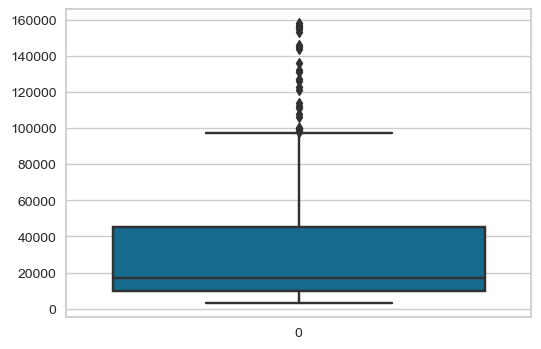

In [26]:
#Box plots

plt.figure(figsize = (6, 4))
sns.boxplot(data['Avg_Credit_Limit'])

# fig, ax = plt.subplots(figsize = (20, 15))
# for i in range(0, len(cols)):
#     plt.subplot(3, 2, i+1)
#     sns.boxplot(data[cols[i]])
#     plt.xlabel(cols[i])

#### Feature Engineering 

In [27]:
# feature scaling

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [28]:
df_scaled = np.copy(data_scaled)

In [29]:
data_scaled

array([[ 2.37167278, -1.24222947, -0.89443095, -0.53765118, -1.28136884],
       [ 0.66697118, -0.76102583, -1.51068035,  2.99865246,  1.85888719],
       [ 0.66697118,  1.16378875, -0.89443095,  0.24819407,  0.11430051],
       ...,
       [ 2.33757875,  2.60739968, -0.89443095,  2.99865246, -1.28136884],
       [ 1.82616827,  2.60739968, -0.89443095,  4.17742033, -0.58353417],
       [ 3.90590423,  1.64499239, -0.89443095,  2.60572983, -0.9324515 ]])

### K-means clustering algorithms

In [30]:
wcss = []
cluster_list = range(1, 12)

for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

In [31]:
labels = kmeans.labels_

In [32]:
centroids = kmeans.cluster_centers_

In [33]:
clusters_df = pd.DataFrame({"num_clusters": cluster_list, "wcss": wcss})
clusters_df.sort_values('wcss', ascending = True, inplace = True)
clusters_df[0:10]

,num_clusters,wcss
10,11,511.335345
9,10,530.320795
8,9,560.601128
7,8,591.274751
6,7,621.820349
5,6,671.079486
4,5,746.309232
3,4,845.320249
2,3,1016.959367
1,2,1872.556547


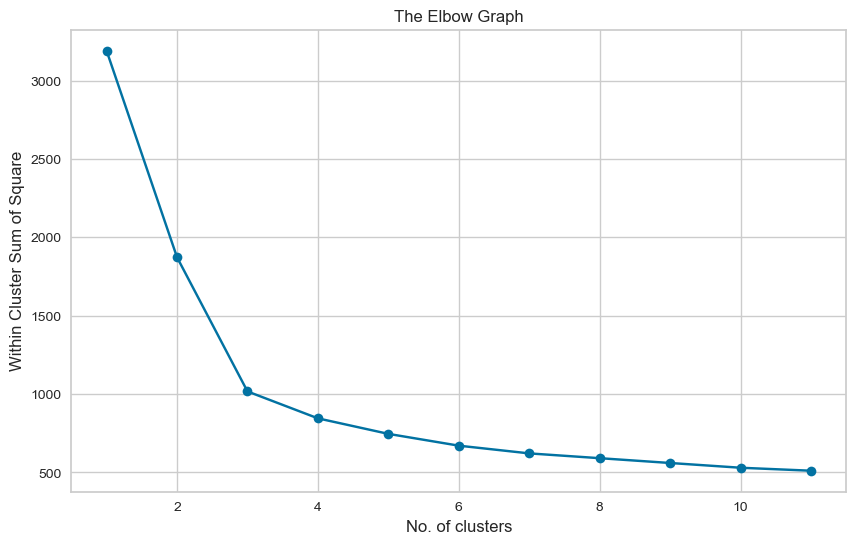

In [34]:
# Plot the elbow graph

plt.figure(figsize = (10, 6))

plt.plot(cluster_list, wcss, 'bo-')
plt.title("The Elbow Graph")
plt.xlabel("No. of clusters")
plt.ylabel("Within Cluster Sum of Square")
plt.show()

***Observation :***

- From the above graph of "Elbow Method", we can find the possible number of clusters. From the graph, we can see the elbow bend at 3.

- we can choose K=3

- Will decide K based on Silhouette score

In [35]:
sil_score = []

for cluster in range(2,12):
    kmeans = KMeans(n_clusters = cluster, init = "k-means++", max_iter = 300, random_state = 42).fit_predict(data_scaled)
    score = metrics.silhouette_score(data_scaled, kmeans, metric='euclidean')
    print("For n_clusters = {}, the silhouette score is {})".format(cluster, score))
    sil_score.append((score))

For n_clusters = 2, the silhouette score is 0.43432903166637143)
For n_clusters = 3, the silhouette score is 0.503352243228426)
For n_clusters = 4, the silhouette score is 0.3598205712337584)
For n_clusters = 5, the silhouette score is 0.334066792552443)
For n_clusters = 6, the silhouette score is 0.25110470064004103)
For n_clusters = 7, the silhouette score is 0.24559283852115665)
For n_clusters = 8, the silhouette score is 0.23319355430228617)
For n_clusters = 9, the silhouette score is 0.22658934916168444)
For n_clusters = 10, the silhouette score is 0.21784100868410775)
For n_clusters = 11, the silhouette score is 0.20444116914089883)


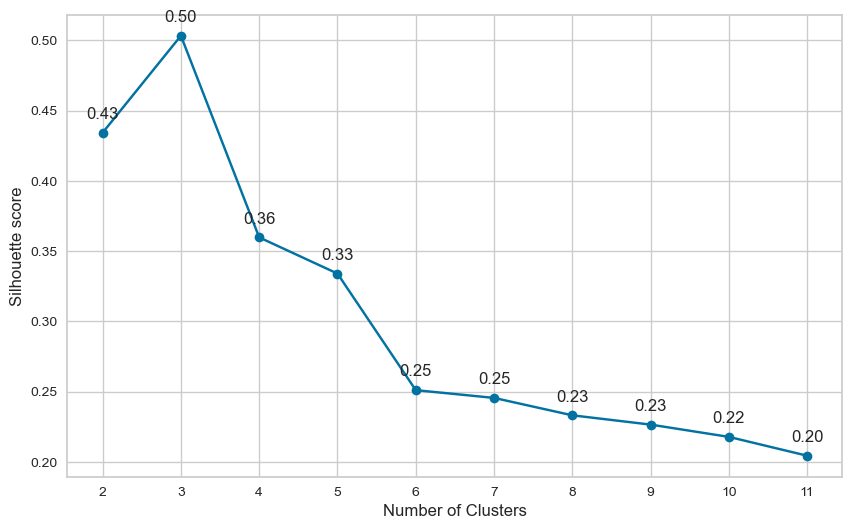

In [36]:
plt.figure(figsize = (10, 6))

plt.plot(range(2, 12), sil_score, 'bo-')
plt.xticks(range(2, 12))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')

for x, y in zip(range(2, 12), sil_score):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x, y), textcoords = "offset points", xytext = (0, 10), ha = "center")

plt.show()

***Observation :***

- This visualization is much richer than the previous one: although it confirms that k = 3 is a very good choice.

- At K = 3, we have a Sil_Score of 0.50.

- We will take K=3

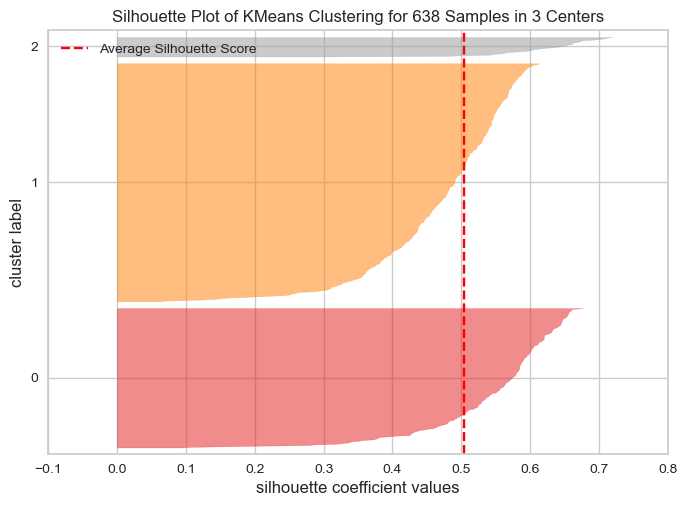

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 638 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
# finding optimal no. of clusters with silhouette coefficients

visualizer = SilhouetteVisualizer(KMeans(3, random_state = 42))
visualizer.fit(data_scaled)
visualizer.show()

***Running KMeans with 2 clusters based on high Silhouette score and optimal low inertia based on Elbow method***

In [38]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 42, init = "k-means++")
kmeans.fit_predict(data_scaled)

array([1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [39]:
kmeans.labels_

array([1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [40]:
kmeans.cluster_centers_

array([[-0.62266602, -1.04459226, -0.93569765,  0.46570481,  1.11588018],
       [ 0.10798971,  0.44450268,  0.64296612, -0.54690852, -0.58170737],
       [ 3.069535  ,  2.00589513, -1.12552447,  3.26878676, -0.8670295 ]])

In [41]:
Allmodels = pd.DataFrame()
model_name = []
score_value=[]
score_name = []

model_name.append("KMeans_3")
score_name.append("silhouettescore")

score_value.append(round(silhouette_score(data_scaled, kmeans.labels_),4))
silhouette_score(data_scaled, kmeans.labels_)

0.503352243228426

***Observation :***

- A silhouette score closer to 1 is better. We got around 0.50 which is not bad

In [42]:
# adding kmeans cluster labels to the original and scaled dataframes

data['KMeans_Cluster'] = kmeans.labels_

In [43]:
data['KMeans_Cluster'].value_counts(normalize=True)*100

1    59.874608
0    35.109718
2     5.015674
Name: KMeans_Cluster, dtype: float64

***Observation :***

- Cluster 1 has 59% of total customers

- Cluster 0 with 35% of total customers

- Cluster 2 with 5% of total customers

In [44]:
cluster_profile = data.groupby('KMeans_Cluster').mean()
cluster_profile['No. of Customers'] = data.groupby('KMeans_Cluster')['Avg_Credit_Limit'].count().values
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,No. of Customers
KMeans_Cluster,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33604.712042,5.505236,3.494764,0.976440,2.005236,382
2,120468.750000,8.750000,0.625000,10.687500,1.187500,32


***Observation :***

- Cluster 1 has 224 customers

- Cluster 0 with 382 customers

- Cluster 2 with 32 customers

In [45]:
data.groupby('KMeans_Cluster').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
KMeans_Cluster,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,33604.712042,5.505236,3.494764,0.976440,2.005236
2,120468.750000,8.750000,0.625000,10.687500,1.187500


***Observation :***

- Cluster 0: Customers with less credit limit , less number of credit cards, less bank visits and medium online visits and more calls to bank

- Cluster 1: Customers with medium credit limit, medium cards, more bank visits, less online visits and medium calls to bank

- Cluster 2: It includes cutomers with highest Avg credit limit, more number of credit cards, very less bank visits, more online visits and fewer calls made to bank

<Axes: xlabel='Avg_Credit_Limit', ylabel='Total_Credit_Cards'>

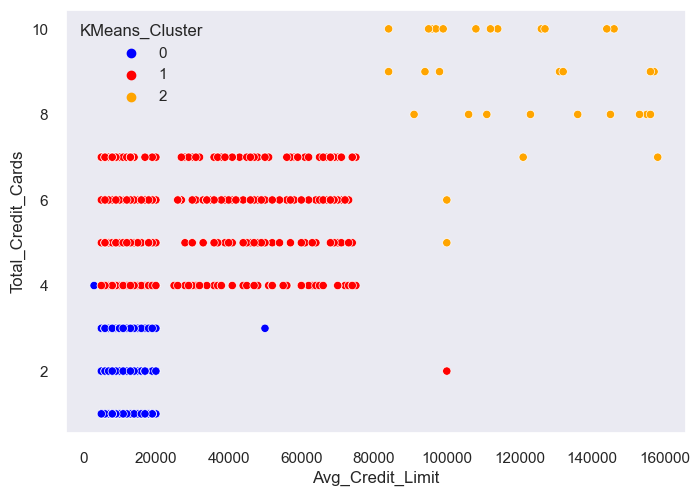

In [46]:
sns.set(style='dark')
sns.scatterplot(x = data['Avg_Credit_Limit'], y = data['Total_Credit_Cards'], hue = data['KMeans_Cluster'], palette = ['blue', 'red', 'orange'])

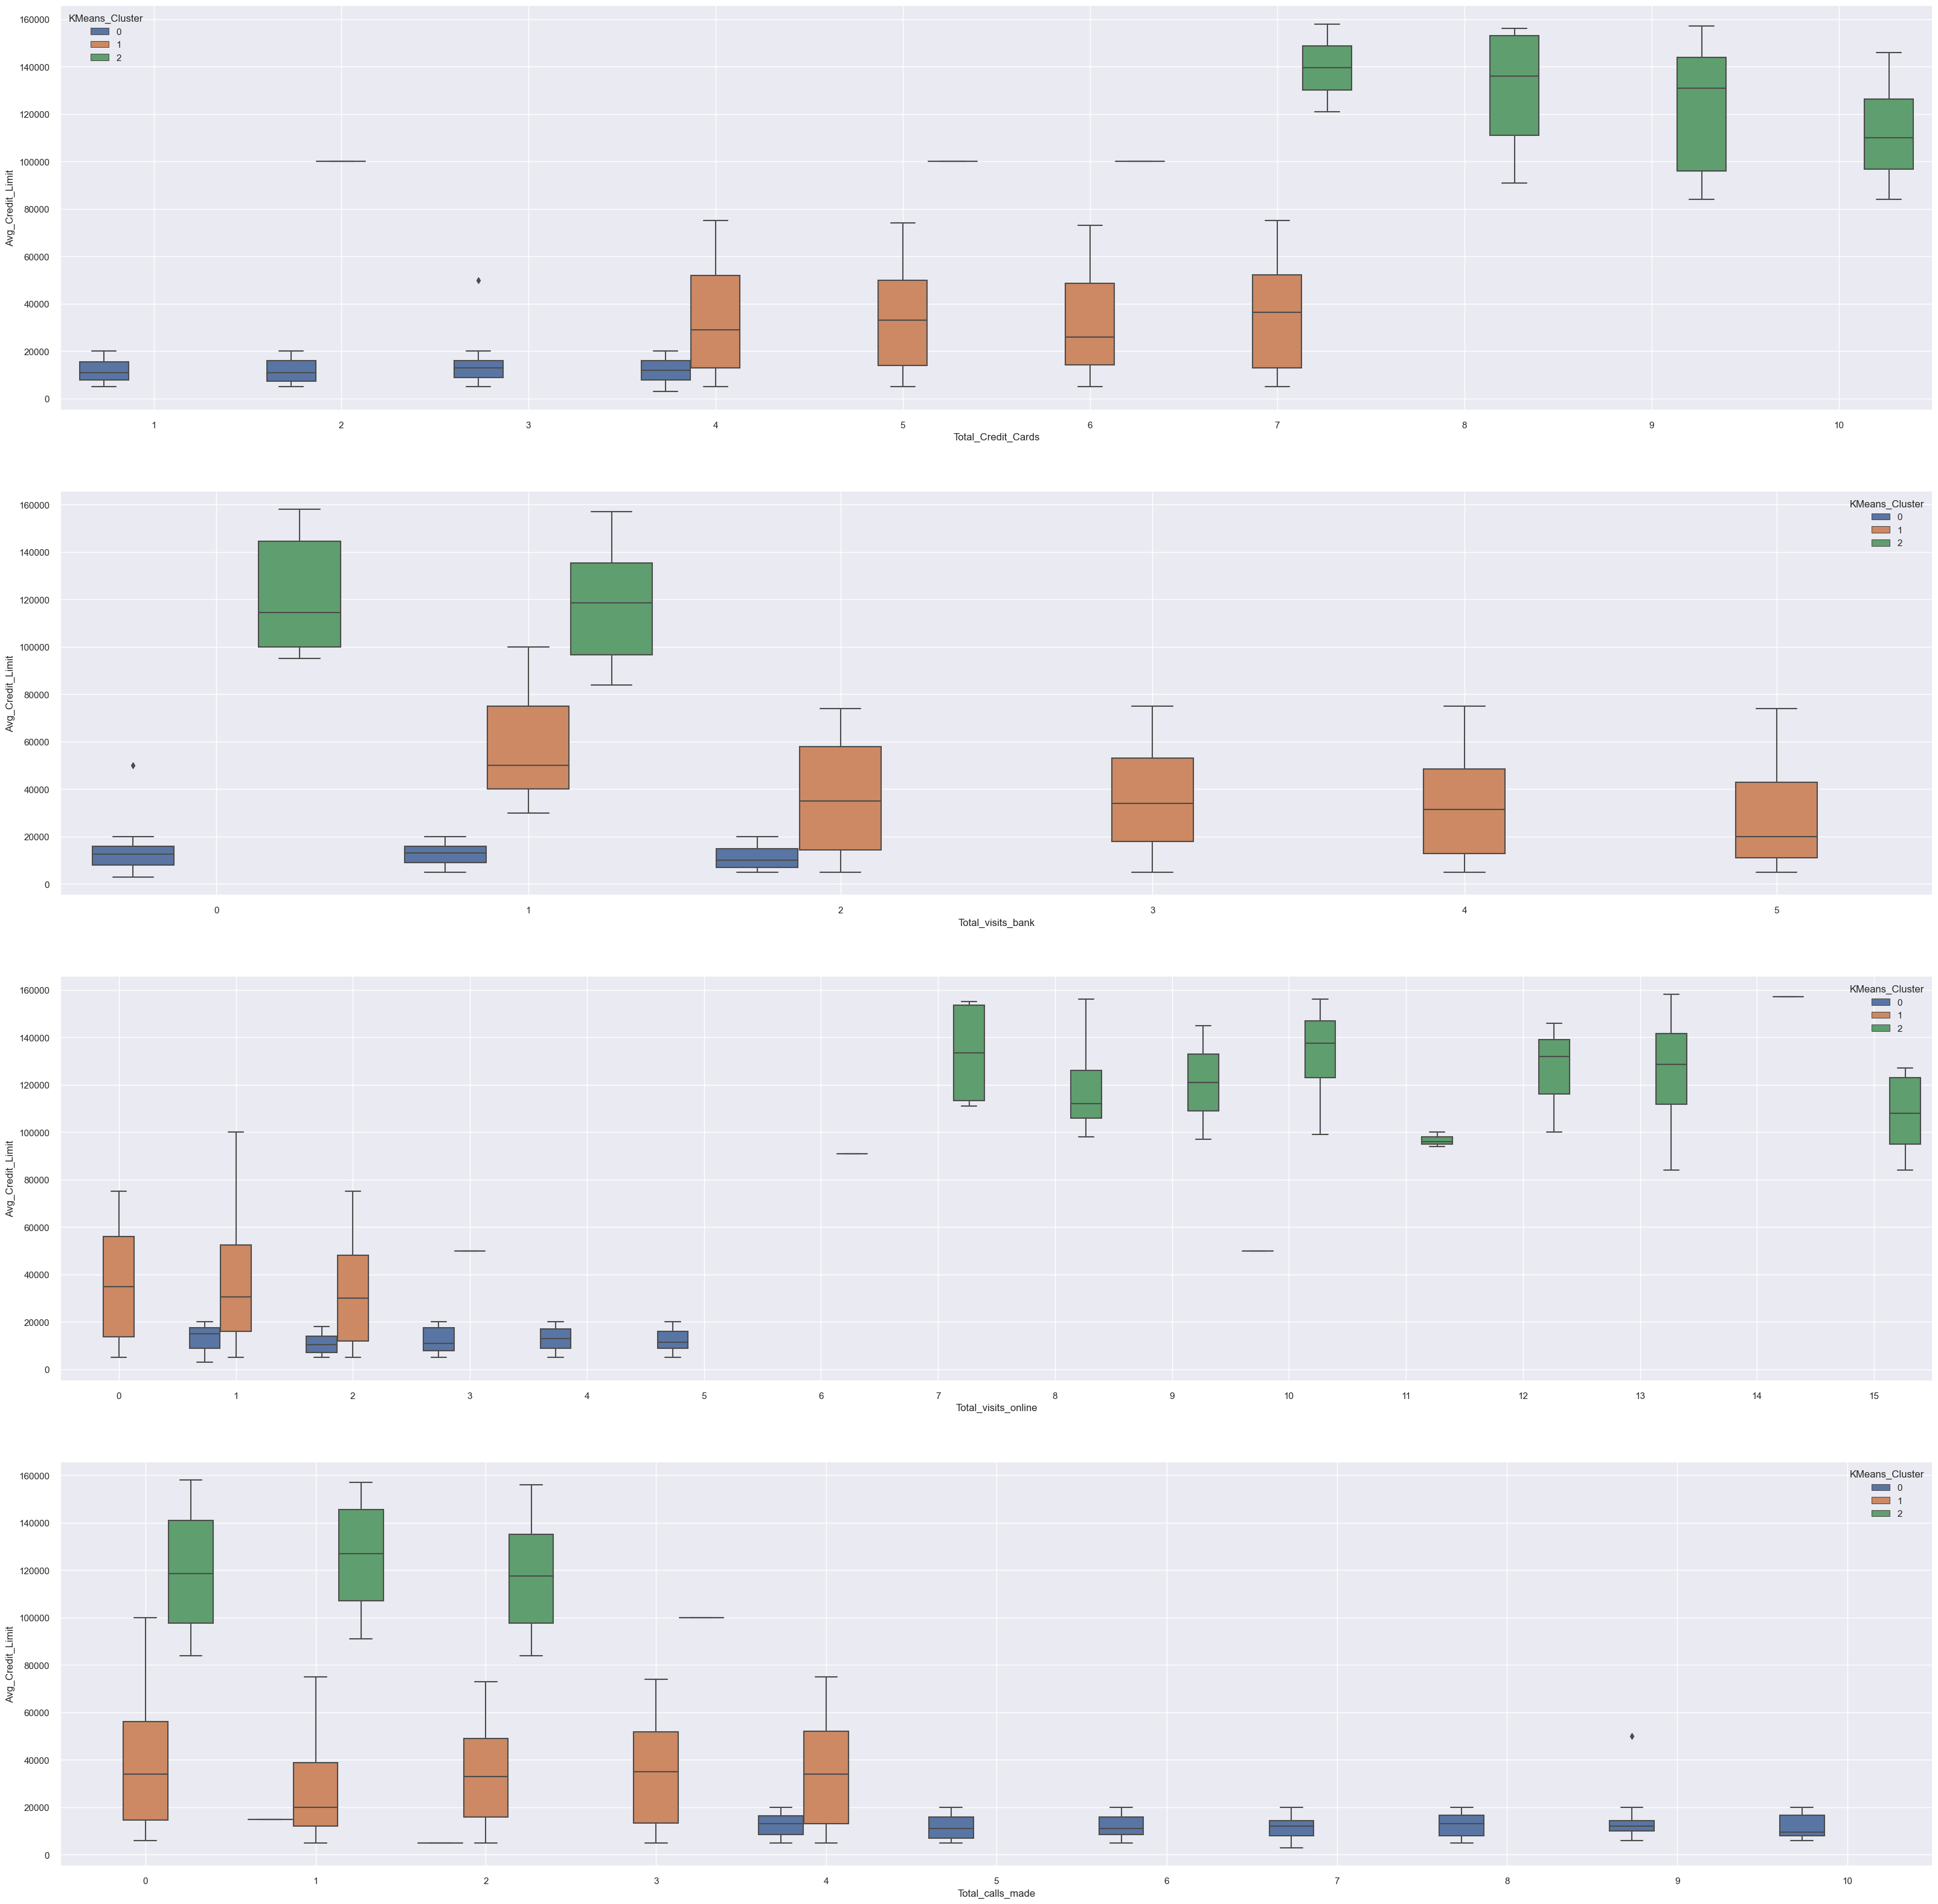

In [47]:
plt.subplots(4,1,figsize = (40,40))

plt.subplot(411)
sns.boxplot(x = data['Total_Credit_Cards'], y = data['Avg_Credit_Limit'], hue = data['KMeans_Cluster'])
plt.grid(True)

plt.subplot(412)
sns.boxplot(x = data['Total_visits_bank'], y = data['Avg_Credit_Limit'], hue = data['KMeans_Cluster'])
plt.grid(True)

plt.subplot(413)
sns.boxplot(x = data['Total_visits_online'], y = data['Avg_Credit_Limit'], hue = data['KMeans_Cluster'])
plt.grid(True)

plt.subplot(414)
sns.boxplot(x = data['Total_calls_made'], y = data['Avg_Credit_Limit'], hue = data['KMeans_Cluster'])
plt.grid(True)

plt.show()

***Cluster Analysis :***

- Cluster 0: Customers with less credit limit (less number of credit cards), more calls made, very less bank visits and less online visits

- Cluster 1: Customers with medium credit limit (medium credit cards), less calls to bank, more bank visits, less online visits

- Cluster 2: It includes cutomers with highest Total credit limit (more number of credit cards), less calls made to bank, less bank visits and more online visits

### Hierarchical Clustering

In [48]:
siliuette_list_hierarchical = []

for cluster in range(2, 10):
    for linkage_method in ['single', 'ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage = linkage_method, affinity = 'euclidean', n_clusters = cluster).fit_predict(data_scaled)
        
        sil_score = silhouette_score(data_scaled, agglomerative, metric = 'euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns = ['clusters', 'sil_score','linkage_method', 'number_of_clusters'])

In [49]:
df_hierarchical.sort_values('sil_score', ascending=False)

,clusters,sil_score,linkage_method,number_of_clusters
2,2,0.573389,average,2
3,2,0.573389,complete,2
5,3,0.503432,ward,3
7,3,0.501480,complete,3
10,4,0.468561,average,4
14,5,0.443698,average,5
1,2,0.434297,ward,2
18,6,0.432723,average,6
4,3,0.395545,single,3
9,4,0.339481,ward,4


In [50]:
hc = AgglomerativeClustering(n_clusters = 2, linkage = 'complete', affinity = 'euclidean').fit_predict(data_scaled)

In [51]:
# hc_labels = hc.labels_

In [52]:
# model_name.append('AgglomerativeClustering_3')
# score_name.append("silhouettescore")
# score_value.append(round(silhouette_score(data_scaled, hc_labels), 4))
# silhouette_score(data_scaled, hc_labels)

***Observation :***

- Agglomerative Clustering score around 0.57 which is not bad

In [53]:
data['Agglomerative_Cluster'] = hc
cluster_profile = data.groupby('Agglomerative_Cluster').mean()
cluster_profile['No. of customers'] = data.groupby('Agglomerative_Cluster')['Avg_Credit_Limit'].count().values
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,No. of customers
Agglomerative_Cluster,,,,,,,
0,25683.168317,4.361386,2.547855,1.929043,3.80363,0.630363,606
1,120468.750000,8.750000,0.625000,10.687500,1.18750,2.000000,32


***Observation :***

- Cluster 0: Customers with less credit limit, few credit cards, more bank visits, very less online visits and more calls to bank

- Cluster 1: It includes cutomers with highest credit limit, more credit cards, less bank visits, more online visits and more calls made to bank

In [54]:
data.groupby('Agglomerative_Cluster').count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster
Agglomerative_Cluster,,,,,,
0,606,606,606,606,606,606
1,32,32,32,32,32,32


***Observation :***

- Here the data is distributed in 2 clusters. 1st cluster (Cluster 0) has 606 data points, 2nd cluster (Cluster 1) has 32 data points

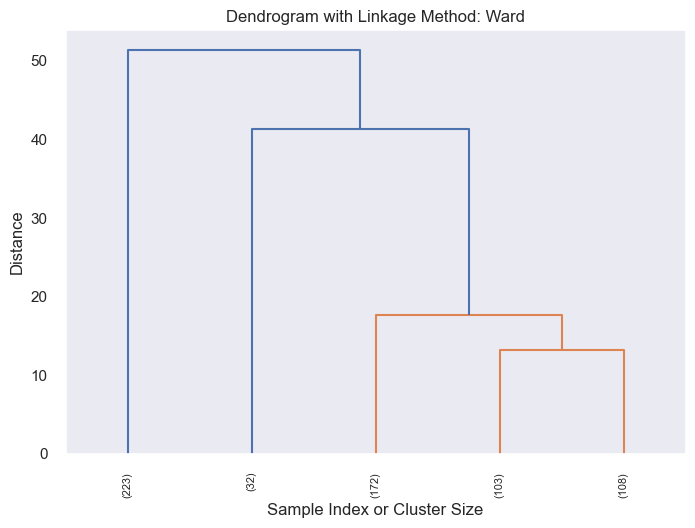

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.title("Dendrogram with Linkage Method: Ward") 
plt.xlabel('Sample Index or Cluster Size') 
plt.ylabel('Distance') 
          

dendrogram(linkage(data_scaled, method='ward'), p = 5, truncate_mode = "lastp", leaf_rotation = 90, color_threshold = 40, leaf_font_size = 8) 
plt.show() 

### Compare cluster K-means clusters and Hierarchical clusters 

In [56]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 42, init = "k-means++").fit_predict(data_scaled)

In [57]:
Agglomerative_hc = AgglomerativeClustering(linkage = 'complete', affinity = 'euclidean', n_clusters = 2).fit_predict(data_scaled)

In [58]:
kmeans_Silhouette_Score        = metrics.silhouette_score(data_scaled, kmeans, metric = 'euclidean')

Agglomerative_Silhouette_Score = metrics.silhouette_score(data_scaled, Agglomerative_hc, metric = 'euclidean')

In [59]:
Clustering_Silhouette_Scores  = [ ['KMeans', kmeans_Silhouette_Score ], ['Hierarchical', Agglomerative_Silhouette_Score ]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 

Clustering_Silhouette_Scores.sort_values(by = 'Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
1,Hierarchical,0.573389
0,KMeans,0.503352


***Observation :***

- Hierarchical cluster has greater than K-means clusters.

- The labeling of cluster is different between K-means clusters & Hierarchical cluster.

- Hierarchical clusters - Silhouette Score is 0.5733

- KMeans clusters - Silhouette Score is 0.5033

- Hierarchical clusters - Cluster 1 has one customer more than cluster 1 in K-means clustering. ( 606 vs 224 )

- Hierarchical clusters - Cluster 2 has one customer less than cluster 0 in K-means clustering. ( 32 vs 382 )

- Hierarchical clusters silhouette score is almost same as K-means clusters ( 0.5733 vs. 0.5033)

- Silhouette score closer to 1 indicate the clustering is better. In this case, we can say that K-means clusters is slightly better than k-means cluster.

***The Hierarchical method seems more suitable with a high silhouette score, after checking clusters and the number of variables in each cluster***

### DBSCAN Clustring

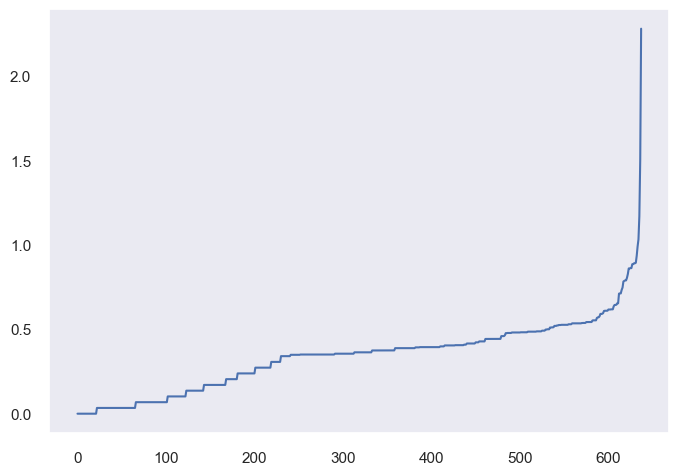

In [60]:
neighbour = NearestNeighbors(n_neighbors= 2)
nb = neighbour.fit(data_scaled)
dist, indices = nb.kneighbors(data_scaled)
dist = np.sort(dist, axis = 0)
dist = dist[:,1]
plt.plot(dist)

In [61]:
siliuette_list_dbscan = []

for minpts in range(1,20):
        dbscan = DBSCAN(eps = 1, min_samples = minpts, metric = 'euclidean').fit(data_scaled)
        label = dbscan.labels_
        sil_score = metrics.silhouette_score(data_scaled, label, metric = 'euclidean')
        siliuette_list_dbscan.append((sil_score, minpts, len(set(label)) ) )
        
data_dbscan = pd.DataFrame(siliuette_list_dbscan, columns = ['sil_score', 'minpts', 'number_of_clusters'])

In [62]:
data_dbscan.sort_values("sil_score", ascending = False)

,sil_score,minpts,number_of_clusters
9,0.555635,10,2
10,0.555635,11,2
17,0.555635,18,2
16,0.555635,17,2
15,0.555635,16,2
14,0.555635,15,2
13,0.555635,14,2
12,0.555635,13,2
11,0.555635,12,2
18,0.555635,19,2


In [63]:
dbscan_= DBSCAN(eps = 1, min_samples = 10, metric = 'euclidean').fit_predict(data_scaled)
dbscan_

array([-1, -1,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [64]:
dbscan_Silhouette_Score = metrics.silhouette_score(data_scaled, dbscan_, metric='euclidean')

In [65]:
Clustering_Silhouette_Scores  = [ ['KMeans', kmeans_Silhouette_Score ], ['Hierarchical', Agglomerative_Silhouette_Score ], ['DBSCAN', dbscan_Silhouette_Score]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
1,Hierarchical,0.573389
2,DBSCAN,0.555635
0,KMeans,0.503352


***Observation :***

- Hierarchical Clusters - Silhouette Score is 0.5733

- DBSCAN Clusters - Silhouette Score is 0.5556

- KMeans Clusters - Silhouette Score is 0.5033

### Key Questions:

***How many different segments of customers are there?***

- There are 3 different segements of customers in AllLife Bank credit card customer base.   


***How are these segments different from each other?***

Using k-means clustering labels as reference: (Cluster 0-2)


- Cluster 0 :
    
    -- Customers who have average credit limit below 2000 and own credit cards 0-4 max.
   
    -- Customers who most visited bank  0-2 times.
    
    -- Customers who least visit bank online. (1-5 times)
    
    -- Customers who make moderate phone calls (4-10 times)
    
    -- Majority of customers are in this group - 35%.
    
    

- Cluster 1 : 
    
    -- Customers who have average credit limit above 8000 and own credit cards 4-7 max.
    
    -- Customers who seldom visit bank 1-5 times.
    
    -- Customers who visit bank online moderately (0-2 times)
    
    -- Customers who make most phone calls (0-4 times)
    
    -- 59% of customers are in this group.  


- Cluster 2 :
    
    -- Customers who have average credit limit 8000-160000 and own most credit cards 7-10 max.
    
    -- Customers who least visited bank 0-1 times.
    
    -- Customers who most visit bank online . (7-15 times)
    
    -- Customers who make least phone calls (0-2 times)
    
    -- Only 5% of customers are in this group. 



***What are your recommendations to the bank on how to better market to and service these customers?***

- cluster 0 own less credit card than others, bank should target cluster 0 to upsell credit cards services.

- Besides, bank should provide higher credit limit to target cluster 2 where most of the customers are. 
  With higher credit limit, cluster 2 would be able to spend more.

- Since cluster 2 use the online banking the least,bank should promote more to cluster 2 in order for them 
  to use it.
  
- Cluster 1 is most time bank visit and 59% customer is medium credit limit.

- Assuming cluster 0 who make most phone calls are the customers perceive the support services of the bank 
  poorly. Bank should target cluster 0 and provide better customers service by conducting feedback survey 
  through phone.

### Actionable Insights & Recommendations

There appears to be three distinct categories of customers:

- In-person users: prefer to handle bank transactions in person. They have the medium number of credit cards and the medium available credit. They are also the most active users.

- Phone users: prefer verbally handling transactions. They have fewest credit cards and lowest credit card limit.

- Online users: prefer digital transactions. They also have the most credit cards and the highest available credit. Least number of customers have this type of behaviour.

The customer preferences should be used to contact the customers. Online/phone users will probably prefer email/text notifications, while in-person users prefer mail notifications and upselling (when at the bank location).

Also, the phone and in-person customers should be reached out to promote online banking.